In [8]:
#Import all modules and databases needed for the Exercise
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
import sklearn as sk #this is the most popular library for statistics and machine learning
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

#Import the data set that will be used in the Exercise and show the first few datapoints
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


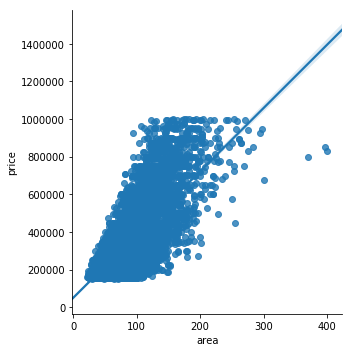

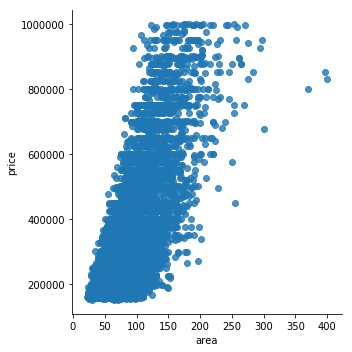

In [9]:
#Clean up the Price varliable in the data-set
df_subset1 = df[df['price'] > 150000]

#Create a scatterplot of one combination of two varaibles, here chosen are the area and its relation to the price.
#With a regression line
sns.lmplot(x = 'area', y = 'price', fit_reg = True, data = df_subset1)
#Without a regression line
sns.lmplot(x = 'area', y = 'price', fit_reg = False, data = df_subset1)

In [10]:
#Calculate the regression line
x = df_subset1[['area']] #Remember: With the x variable we use two [] as there are multiple variables we could use
y = df_subset1['price']
lm = LinearRegression() 
lm.fit(x, y) 
b0 = lm.coef_[0]
b1 = lm.intercept_

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X")

The regression line is equal to y = 3367.34 + 48972.67X


In [15]:
#Show the first 10 results of the predictions of the regression we just calculated
#Predict the price for a house of 70m2
df_subset1['price_p'] = lm.predict(x) 

df_subset1.head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,412645.740736
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,207237.803388
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003,439584.486618
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,244278.578975
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,261115.295151
5,5,Bertrand Russellstraat 46,125,2,1097 HL,20-5-2016,515000,apartment,3,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1991,469890.575734
6,6,Admiraal De Ruijterweg 417 I,64,3,1055 ME,14-6-2016,200000,apartment,4,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,264482.638387
7,7,Deltastraat 10 -boven,155,3,1078 PC,24-5-2016,599000,apartment,5,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,570910.872791
8,8,Ben van Meerendonkstraat 49,85,2,1087 LB,21-5-2016,249000,apartment,3,10-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2007,335196.846326
9,9,Jacob van Lennepstraat 263 B,67,2,1053 JE,13-5-2016,300000,apartment,3,27-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1900,274584.668092


In [20]:
#A house with 70m2 would be a predicted:
lm.predict(70) #Euro

array([284686.69779795])

In [21]:
#We need to create lists of the two variables in order to use sk-learn
#Remember to use [[]] with x (see above)
x = df_subset1[['area']] 
y = df_subset1['price']
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

df_subset1['area'] = lm.predict(x) #generate the predictions and add them to the dataframe
df_subset1['resid'] = df_subset1['price'] - df_subset1['price_p'] #get the residuals by subtracting the prediction from the actual views

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Text(0,0.5,'Residuals (price)')

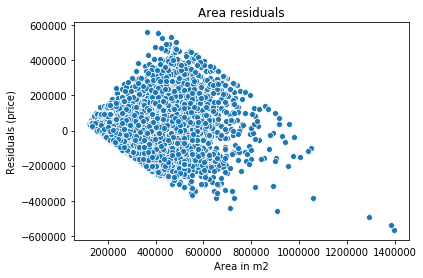

In [23]:
#Present the data in a nice graph | Making a plot for (X, e)
sns.scatterplot(x="area", y="resid", data= df_subset1)
plt.title("Area residuals")
plt.xlabel("Area in m2")
plt.ylabel("Residuals (price)")

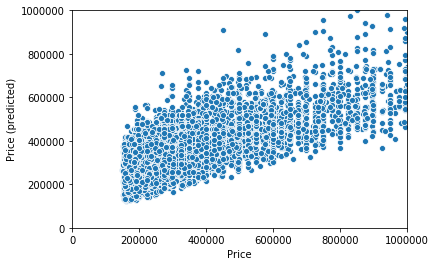

In [24]:
sns.scatterplot(x='price',y='price_p',data=df_subset1)
plt.xlim(0, 1000000) #This sets the x-axis limits to (0, 5e10 = 5000000000)
plt.ylim(0, 1000000) #The same goes for the y-axis. Both axes should have the same length, so they can be better compared
plt.xlabel('Price')
plt.ylabel('Price (predicted)')
plt.show()

In [26]:
r2score = r2_score(df_subset1['price'], df_subset1['price_p'])
print(f'The R^2 score is: {r2score}')

The R^2 score is: 0.5140148356032235


In [27]:
RMSE = math.sqrt(mean_squared_error(df_subset1['price'], df_subset1['price_p']))
print(f'The roost mean squared error is: {RMSE} euro')

The roost mean squared error is: 117705.88183435918 euro


The R^2 is more than 50 percent, so it is very high. This means that the model can be seen as realistic.
The RMSE score is €117705.88, which means that the price is €117705.88 off from the prediction. 
The cheap houses are predicted better because the dots are closer to each other and more in a straight line.